In [1]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt

data_folder = "/home/dog/Documents/EEGDataSet/p300/inria_bci_challenge/npy_zerophase_baseline10/200/test"

train_data_folder = "/home/dog/Documents/EEGDataSet/p300/inria_bci_challenge/npy_zerophase_baseline10/200/train"

chan_names = ['Fp1', 'Fp2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4',
              'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7',
              'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz',
              'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8',
              'PO7', 'POz', 'PO8', 'O1', 'O2']

ERN_info = mne.create_info(chan_names, sfreq=200, ch_types='eeg')

In [2]:
def load_cam_data_trials(data_folder, subject, label2CAM, num2CAM):
    # load ndarray data and labels
    subject_data_dir = os.path.join(data_folder, subject+'_data.npy')
    subject_data = np.load(subject_data_dir)
    # subject_data = np.expand_dims(subject_data, axis=1)  # Just for NoPrecess

    subject_label_path = os.path.join(data_folder, subject+'_label.npy')
    subject_label = np.load(subject_label_path)
    all_label_trial = np.where(subject_label == label2CAM)[0][num2CAM]
    return subject_data[all_label_trial]

def plot_cz_trials(data_folder, subject, label2CAM, num2CAM):
    cz_data1 = load_cam_data_trials(data_folder, subject=subject, label2CAM=label2CAM, num2CAM=num2CAM)[:, 28]
    cz_data_mean1 = np.mean(cz_data1, axis=0)
    plt.plot(np.arange(250)/200, cz_data_mean1, color='r')
    plt.legend(labels=['label{}'.format(label2CAM)], loc='best')
    plt.title('subject{}_Cz'.format(subject))
    plt.show()

# 得到每个被试挑选出来的trial label 0 list
A03_label0_ls = [8, 35, 42, 43, 47, 85, 136, 141]  # 8
A09_label0_ls = [1, 7, 9, 10, 14, 19, 20, 28, 44]  # 9
A10_label0_ls = [1, 7, 10, 11, 14, 23, 24]  # 7
A08_label0_ls = [9, 11, 15, 19, 31, 32, 39, 65, 89, 90]  # 10
A01_label0_ls = [2, 3, 6, 10, 18, 55, 58]  # 7
A05_label0_ls = [3, 72, 88, 94, 196]  # 5
A04_label0_ls = [0, 8, 9, 13, 16, 18, 26, 27, 28, 32, 45, 46, 54, 55, 64]  # 15
A15_label0_ls = [1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]  # 16
A19_label0_ls = [9, 10, 12, 36, 48]  # 5
A25_label0_ls = [0, 18, 22, 28, 113]  # 5

label0_total = {'A09':A09_label0_ls, 'A01':A01_label0_ls, 'A04':A04_label0_ls, 'A03':A03_label0_ls, 
                'A05':A05_label0_ls, 'A08': A08_label0_ls,  'A10': A10_label0_ls, 'A15':A15_label0_ls, 
                'A25': A25_label0_ls, 'A19':A19_label0_ls}

# label 1 list
A01_label1_ls = [24, 32, 64, 79, 89, 105, 129]  # 7
A03_label1_ls = [22, 24, 26, 33, 43, 46, 52, 56]  # 8
A04_label1_ls = [4, 5, 8, 11, 14, 18, 26, 29, 30, 39, 47, 53, 55, 57, 58]  # 15
A05_label1_ls = [48, 51,67, 86, 104]  # 5
A08_label1_ls = [19, 58, 80, 103, 129, 163, 203, 224, 239, 240]  # 10
A09_label1_ls = [76, 84, 94, 101, 105, 106, 110, 115, 116]  # 9
A10_label1_ls = [30, 154, 164, 183, 207, 214, 264]  # 7
A15_label1_ls = [25, 29, 59, 68, 82, 92, 113, 121, 145, 149, 216, 227, 250, 258, 275, 309]  # 16
A19_label1_ls = [4,  5,   16, 41, 63]  # 5
A25_label1_ls = [29, 76, 94, 98, 124]  # 5

label1_total = {'A09':A09_label1_ls, 'A01':A01_label1_ls, 'A04':A04_label1_ls, 'A03':A03_label1_ls,
                'A05':A05_label1_ls, 'A08': A08_label1_ls,  'A10': A10_label1_ls, 'A15':A15_label1_ls, 
                'A25': A25_label1_ls, 'A19':A19_label1_ls}

## raw EEG label 0

In [3]:
label0_trials = []
for key,value in label0_total.items():
    sub_trials = load_cam_data_trials(data_folder, key, 0, value)
    sub_trials = np.mean(sub_trials, 0)
#     sub_trials_repeat = np.repeat(sub_trials, 3, axis=0)
    label0_trials.append(sub_trials)
label0_trials = np.array(label0_trials)
print(label0_trials.shape)  # 135, 250

cz_data_mean0 = np.mean(label0_trials, axis=0)
print(cz_data_mean0.shape)  # 135, 250

(10, 56, 250)
(56, 250)


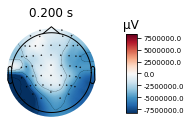

In [4]:
evoked = mne.EvokedArray(cz_data_mean0, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
fig = evoked.plot_topomap(times=[0.2])
fig.savefig('Original_label0_topomap2.png', dpi=600, bbox_inches='tight')

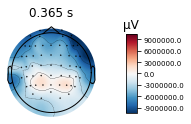

In [5]:
evoked = mne.EvokedArray(cz_data_mean0, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
fig = evoked.plot_topomap(times=[0.365])
fig.savefig('Original_label0_topomap36.png', dpi=600, bbox_inches='tight')

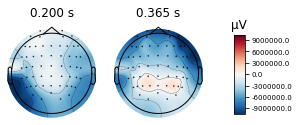

In [29]:
evoked = mne.EvokedArray(cz_data_mean0, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
fig = evoked.plot_topomap(times=[0.2, 0.365])
fig.savefig('Original_label0_topomap2_36.png', dpi=600, bbox_inches='tight')

## raw EEG label 1

In [6]:
label1_trials = []
for key,value in label1_total.items():
    sub_trials = load_cam_data_trials(data_folder, key, 1, value)
    sub_trials = np.mean(sub_trials, 0)
#     sub_trials_repeat = np.repeat(sub_trials, 3, axis=0)
    label1_trials.append(sub_trials)
label1_trials = np.array(label1_trials)
print(label1_trials.shape)  # 135, 250

cz_data_mean1 = np.mean(label1_trials, axis=0)
print(cz_data_mean1.shape)  # 135, 250

(10, 56, 250)
(56, 250)


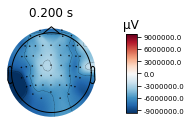

In [7]:
evoked = mne.EvokedArray(cz_data_mean1, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
fig = evoked.plot_topomap(times=[0.2])
fig.savefig('Original_label1_topomap2.png', dpi=600, bbox_inches='tight')

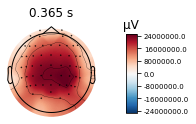

In [8]:
evoked = mne.EvokedArray(cz_data_mean1, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
fig = evoked.plot_topomap(times=[0.365])
fig.savefig('Original_label1_topomap36.png', dpi=600, bbox_inches='tight')

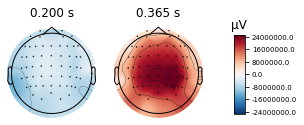

In [30]:
evoked = mne.EvokedArray(cz_data_mean1, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
fig = evoked.plot_topomap(times=[0.2, 0.365])
fig.savefig('Original_label1_topomap2_36.png', dpi=600, bbox_inches='tight')

## 将所有的原始信号地形图绘制到一起

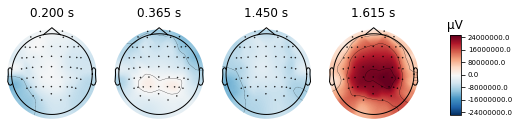

In [34]:
cz_data_mean = np.concatenate((cz_data_mean0, cz_data_mean1), 1)
# print(cz_data_mean.shape) (56, 500), Cz0在前
evoked = mne.EvokedArray(cz_data_mean, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
fig = evoked.plot_topomap(times=[0.2, 0.365, 0.2+1.25, 0.365+1.25])
fig.savefig('Original_all_topomap2_36.png', dpi=600, bbox_inches='tight')

(56,)
(56, 10)


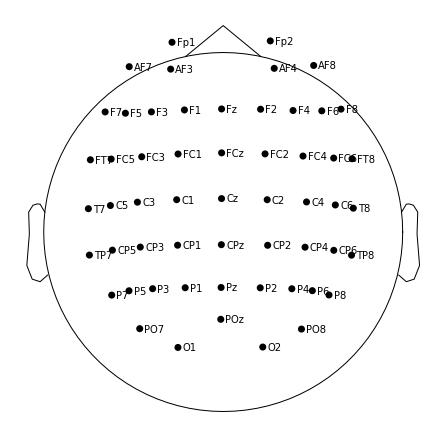

In [9]:
import pandas as pd


cam_folder = '/home/dog/code_T640/EignCAM/eeg_cam_fig'

# test temporal.csv
eigengradcam_name = 'eigencam_temporal_label0_[43].csv'
cam_path = os.path.join(cam_folder, 'A03', eigengradcam_name)
cam_np = pd.read_csv(cam_path, header=None)
cam_np = cam_np.to_numpy()

# 查看标准10-20命名
# easycap_montage = mne.channels.make_standard_montage('standard_1020')
# print('easycap_montage: ', easycap_montage)
# easycap_montage.plot()  # 2D


cam_np_mean = np.mean(cam_np, axis=1)  # 全部的平均值来表示导联信息
print(cam_np_mean.shape)
# label 0 A03在0.4s左右有强烈的响应, 查看0.4s各个导联的响应
# print(cam_np[:, int(0.4*250)])
channel_data = cam_np[:, 95:105]
# channel_data = np.expand_dims(channel_data, 1)
print(channel_data.shape)
evoked = mne.EvokedArray(channel_data, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
fig = evoked.plot_sensors(show_names=True)
# evoked.animate_topomap()
fig.savefig('channel_location_same.png', dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题

### 查看A03全部lable0的平均trial得到的地形图


In [10]:
def cam_label_ls(label2CAM, ls):
    cam_ls = []
    for i in ls:
        trial_label = 'eigengradcam_temporal_label{}_[{}].csv'.format(label2CAM, i)
        cam_ls.append(trial_label)
    return cam_ls



def cam_trial_csv(subject, eigengradcam_name, cam_folder=cam_folder):
    '''
    返回一个包含不同trial数的list
    '''
    cam_trial = []
    if isinstance(eigengradcam_name, list):
        for i in eigengradcam_name:
            cam_path = os.path.join(cam_folder, subject, i)
            cam_np = pd.read_csv(cam_path, header=None)
            cam_np = cam_np.to_numpy()
            cam_trial.append(cam_np)
    else:
        cam_path = os.path.join(cam_folder, subject, eigengradcam_name)
        cam_np = pd.read_csv(cam_path, header=None)
        cam_np = cam_np.to_numpy()
        cam_trial.append(cam_np)
    return np.array(cam_trial)


In [11]:
def sub_topomaps(label2CAM, subject):
    assert label2CAM in [0 , 1]
    sub_dic = label1_total if label2CAM==1 else label0_total
    cam_ls = cam_label_ls(label2CAM, sub_dic[subject])
    sub_trials = cam_trial_csv(subject, cam_ls)
    print(sub_trials.shape)
    # 先选取95: 105的数据进行平均
    cam_topo_data = sub_trials[:, :, :]
#     cam_topo_data = sub_trials[:, :, data_range[0]: data_range[1]]

    cam_topo_data_mean = np.mean(cam_topo_data, 0)

    evoked = mne.EvokedArray(cam_topo_data_mean, info=ERN_info, tmin=0, nave=56)
    evoked.set_montage('standard_1020')
#     fig = evoked.plot_sensors(show_names=True, sphere='auto')
    evoked.plot_topomap(times=[0.13, 0.2, 0.365, 0.385, 0.485])

In [12]:
def sub_topomaps_single_time(label2CAM, subject, time):
    assert label2CAM in [0 , 1]
    sub_dic = label1_total if label2CAM==1 else label0_total
    cam_ls = cam_label_ls(label2CAM, sub_dic[subject])
    sub_trials = cam_trial_csv(subject, cam_ls)
    print(sub_trials.shape)
    # 先选取95: 105的数据进行平均
    cam_topo_data = sub_trials[:, :, :]
#     cam_topo_data = sub_trials[:, :, data_range[0]: data_range[1]]

    cam_topo_data_mean = np.mean(cam_topo_data, 0)

    evoked = mne.EvokedArray(cam_topo_data_mean, info=ERN_info, tmin=0, nave=56)
    evoked.set_montage('standard_1020')
#     fig = evoked.plot_sensors(show_names=True, sphere='auto')
    evoked.plot_topomap(times=[time])

## label 0 average

In [22]:
def get_sub_mean(subject, label2CAM):
    assert label2CAM in [0 , 1]
    sub_dic = label1_total if label2CAM==1 else label0_total
    cam_ls = cam_label_ls(label2CAM, sub_dic[subject])
    
    sub_trials = cam_trial_csv(subject, cam_ls)
    sub_trials_mean = np.mean(sub_trials, axis=0)
    return sub_trials_mean

label0_cam = []
for key,value in label0_total.items():
    sub_cam_value = get_sub_mean(key, 0)
    label0_cam.append(sub_cam_value)
    
label0_cam = np.array(label0_cam)
print('label0_cam shape: ', label0_cam.shape)

label1_cam = []
for key,value in label1_total.items():
    sub_cam_value = get_sub_mean(key, 1)
    label1_cam.append(sub_cam_value)
    
label1_cam = np.array(label1_cam)
print('label1_cam shape: ', label1_cam.shape)


label0_cam shape:  (10, 56, 250)
label1_cam shape:  (10, 56, 250)


In [23]:
All_label0_mean = np.mean(label0_cam, 0)
All_label1_mean = np.mean(label1_cam, 0)
print('All_label0_mean.shape: ', All_label0_mean.shape)
print('All_label1_mean.shape: ', All_label1_mean.shape)

All_label0_mean.shape:  (56, 250)
All_label1_mean.shape:  (56, 250)


In [24]:
# evoked = mne.EvokedArray(All_label0_mean, info=ERN_info, tmin=0, nave=56)
# evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True)
# fig.savefig('channel_location.png', dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题

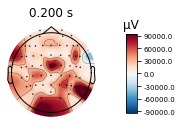

In [25]:
evoked = mne.EvokedArray(All_label0_mean, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
plt = evoked.plot_topomap(times=[0.2])
plt.savefig('label0_channelEigenCAM_2.png', dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题

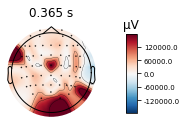

In [26]:
evoked = mne.EvokedArray(All_label0_mean, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
plt = evoked.plot_topomap(times=[0.365])
plt.savefig('label0_channelEigenCAM_36.png', dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题

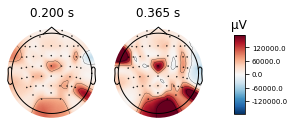

In [27]:
evoked = mne.EvokedArray(All_label0_mean, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
plt = evoked.plot_topomap(times=[0.2, 0.365])
plt.savefig('label0_channelEigenCAM_2_36.png', dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题

## label 1 average

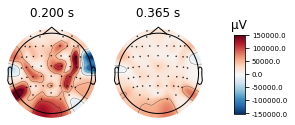

In [28]:
evoked = mne.EvokedArray(All_label1_mean, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
plt = evoked.plot_topomap(times=[0.2, 0.365])
plt.savefig('label1_channelEigenCAM_2_36.png', dpi=600, bbox_inches='tight') # 解决图片不清晰，不完整的问题

## uniform the unit for label 0 and label 1

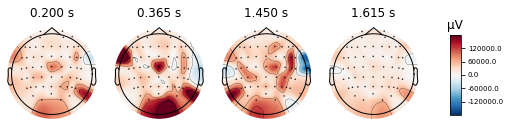

In [35]:
All_label_mean = np.concatenate((All_label0_mean, All_label1_mean), 1)
evoked = mne.EvokedArray(All_label_mean, info=ERN_info, tmin=0, nave=56)
evoked.set_montage('standard_1020')
# fig = evoked.plot_sensors(show_names=True, sphere='auto')
plt = evoked.plot_topomap(times=[0.2, 0.365, 0.2+1.25, 0.365+1.25])
plt.savefig('All_channelEigenCAM_2_36.png', dpi=600, bbox_inches='tight') # 解